<a href="https://colab.research.google.com/github/xplorer5/power-generation-using-cloud-images/blob/main/cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv("dataset.csv")
df.head(10)


,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
5,Camp Murray,20171204,1430,47.11,-122.57,84,2.017120e+11,12,14,Winter,47.10083,18.12363,2.92027,0,5.0,1023.7,722
6,Camp Murray,20171205,1115,47.11,-122.57,84,2.017120e+11,12,11,Winter,43.55469,19.41269,3.41284,0,4.0,1025.7,722
7,Camp Murray,20171205,1200,47.11,-122.57,84,2.017120e+11,12,12,Winter,30.56641,23.90930,4.82020,5,7.0,1026.0,722
8,Camp Murray,20171205,1300,47.11,-122.57,84,2.017120e+11,12,13,Winter,17.90771,32.32346,5.98127,5,10.0,1025.7,722
9,Camp Murray,20171205,1400,47.11,-122.57,84,2.017120e+11,12,14,Winter,14.40430,35.41267,4.96121,6,10.0,1025.4,722


In [ ]:
newDf = df.drop("YRMODAHRMI" , axis ="columns")
df = newDf
df.head(5)

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   Month          21045 non-null  int64  
 7   Hour           21045 non-null  int64  
 8   Season         21045 non-null  object 
 9   Humidity       21045 non-null  float64
 10  AmbientTemp    21045 non-null  float64
 11  PolyPwr        21045 non-null  float64
 12  Wind.Speed     21045 non-null  int64  
 13  Visibility     21045 non-null  float64
 14  Pressure       21045 non-null  float64
 15  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 2.6+ MB


In [ ]:
matrix = df.corr().round(2)
print(matrix)


               Date  Time  Latitude  Longitude  Altitude  Month  Hour  \
Date           1.00  0.01      0.20      -0.04     -0.07  -0.59  0.01   
Time           0.01  1.00      0.06       0.01      0.04  -0.01  1.00   
Latitude       0.20  0.06      1.00       0.14      0.30   0.03  0.05   
Longitude     -0.04  0.01      0.14       1.00      0.11   0.07  0.00   
Altitude      -0.07  0.04      0.30       0.11      1.00   0.02  0.04   
Month         -0.59 -0.01      0.03       0.07      0.02   1.00 -0.01   
Hour           0.01  1.00      0.05       0.00      0.04  -0.01  1.00   
Humidity       0.11 -0.19     -0.12       0.02     -0.43  -0.13 -0.21   
AmbientTemp   -0.09  0.16     -0.23       0.07      0.10   0.21  0.17   
PolyPwr        0.02  0.08     -0.25       0.01     -0.08  -0.02  0.09   
Wind.Speed     0.03  0.14     -0.15      -0.06     -0.01  -0.08  0.14   
Visibility    -0.03  0.01     -0.07      -0.02      0.02   0.06  0.03   
Pressure       0.06 -0.05     -0.31      -0.09     

<ipython-input-5-1901fcf7025c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


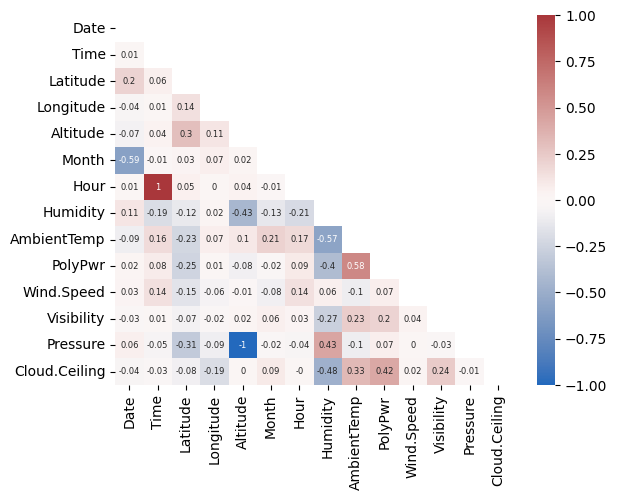

In [ ]:
import seaborn as sns
import numpy as np
mask=np.triu(np.ones_like(matrix,dtype=bool))
sns.heatmap(matrix,annot=True,annot_kws={'size':6},vmax=1,vmin=-1,center=0,cmap='vlag',mask=mask)
plt.show()


In [ ]:
newDf = df.drop("Altitude", axis = "columns")
df = newDf
df.head(5)

,Location,Date,Time,Latitude,Longitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [ ]:
# Encode location data
df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)
# Encode season data
df_with_loc_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

df.head(10)

,Location,Date,Time,Latitude,Longitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
5,Camp Murray,20171204,1430,47.11,-122.57,12,14,Winter,47.10083,18.12363,2.92027,0,5.0,1023.7,722
6,Camp Murray,20171205,1115,47.11,-122.57,12,11,Winter,43.55469,19.41269,3.41284,0,4.0,1025.7,722
7,Camp Murray,20171205,1200,47.11,-122.57,12,12,Winter,30.56641,23.90930,4.82020,5,7.0,1026.0,722
8,Camp Murray,20171205,1300,47.11,-122.57,12,13,Winter,17.90771,32.32346,5.98127,5,10.0,1025.7,722
9,Camp Murray,20171205,1400,47.11,-122.57,12,14,Winter,14.40430,35.41267,4.96121,6,10.0,1025.4,722


In [ ]:

min_hour_of_interest = 10
max_hour_of_interest = 15
# Calculate time lapse since onset of power generation
df_with_loc_season_en['delta_hr']= df_with_loc_season_en.Hour-min_hour_of_interest
# Create cyclic month features
df_with_loc_season_en['sine_mon']=np.sin((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['cos_mon']= np.cos((df_with_loc_season_en.Month - 1)*np.pi/11)
# Create cyclic hour features
df_with_loc_season_en['sine_hr']= np.sin((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest- min_hour_of_interest)))
df_with_loc_season_en['cos_hr']= np.cos((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest- min_hour_of_interest)))# Define time bounds in data

In [ ]:
data = df_with_loc_season_en
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21045 non-null  int64  
 1   Time                 21045 non-null  int64  
 2   Latitude             21045 non-null  float64
 3   Longitude            21045 non-null  float64
 4   Month                21045 non-null  int64  
 5   Hour                 21045 non-null  int64  
 6   Humidity             21045 non-null  float64
 7   AmbientTemp          21045 non-null  float64
 8   PolyPwr              21045 non-null  float64
 9   Wind.Speed           21045 non-null  int64  
 10  Visibility           21045 non-null  float64
 11  Pressure             21045 non-null  float64
 12  Cloud.Ceiling        21045 non-null  int64  
 13  Location_Grissom     21045 non-null  uint8  
 14  Location_Hill Weber  21045 non-null  uint8  
 15  Location_JDMT        21045 non-null 

In [ ]:
x = data.drop(["PolyPwr"] , axis =1)
y = data["PolyPwr"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=104,train_size=0.8, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=109,random_state=101)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.5711251112404394
Root Mean Squared Error: 3.934670847598762


In [ ]:
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


In [ ]:
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 45.653	valid_0's l1: 5.82823
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 41.9968	valid_0's l1: 5.57768
[3]	valid_0's l2: 38.8116	valid_0's l1: 5.35204
[4]	valid_0's l2: 36.207	valid_0's l1: 5.15331
[5]	valid_0's l2: 33.9522	valid_0's l1: 4.97214
[6]	valid_0's l2: 32.0449	valid_0's l1: 4.8119
[7]	valid_0's l2: 30.4627	valid_0's l1: 4.66201
[8]	valid_0's l2: 29.0636	valid_0's l1: 4.52864
[9]	valid_0's l2: 27.8406	valid_0's l1: 4.40748
[10]	valid_0's l2: 26.8848	valid_0's l1: 4.30209
[11]	valid_0's l2: 26.0007	valid_0's l1: 4.20624
[12]	valid_0's l2: 25.2375	valid_0's l1: 4.12189
[13]	valid_0's l2: 24.5495	valid_0's l1: 4.03711
[14]	valid_0's l2: 23.891	valid_0's l1: 3.95517
[15]	valid_0's l2: 23.3576	valid_0's l1: 3.88443
[16]	valid_0's l2: 22.8284	valid_0's l1: 3.81885
[17]	valid_0's l2: 22.4332	valid_0's l1: 3.76285
[18]	valid_0's l2: 22.0055	valid_0's l1: 3.70288
[19]	valid_0's l

In [ ]:
y_pred = model.predict(X_test)





In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.9034933476824873
Root Mean Squared Error: 4.138632041507493


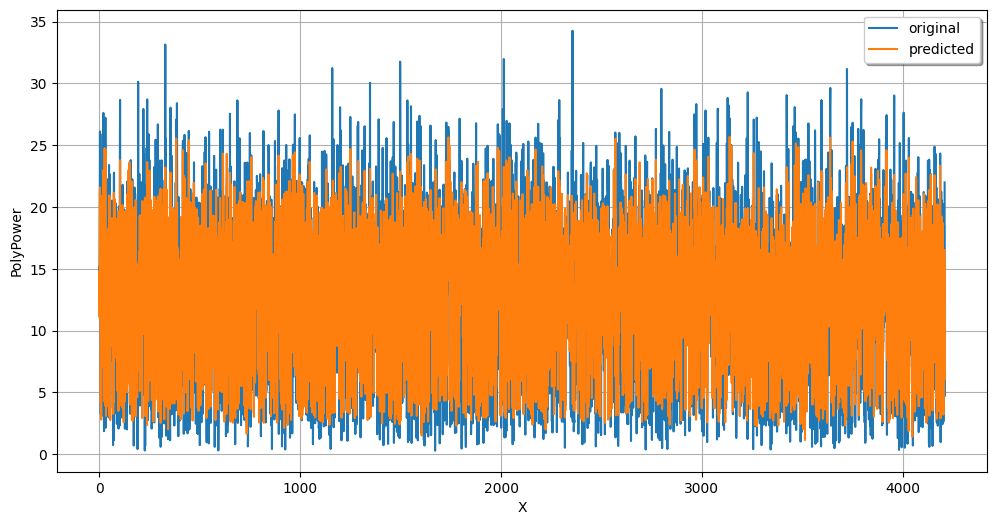

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.xlabel('X')
plt.ylabel('PolyPower')
plt.legend(loc='best',fancybox=True, shadow=True)

plt.grid(True)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

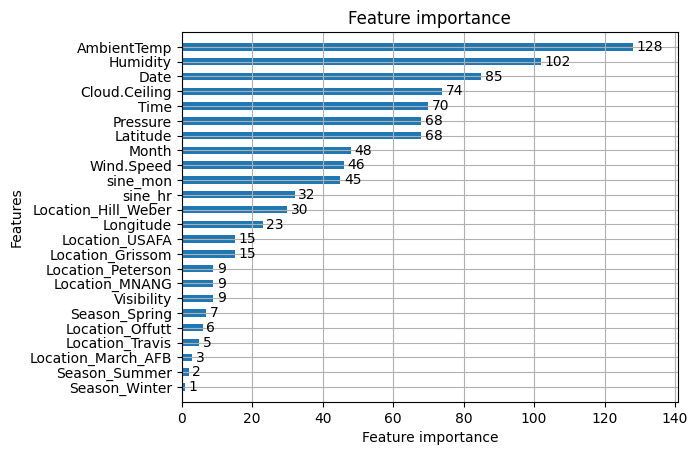

In [ ]:
lgb.plot_importance(model, height=.5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np



# Preprocess the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the k-NN model
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 19.412516290752862
R2 Score: 0.6140351680565803


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
lgbm = LGBMRegressor(random_state=42)


In [ ]:
meta_learner = LinearRegression()

# Define the stacking regressor
estimators = [('rf', rf), ('knn', knn), ('lgbm', lgbm)]
stack = StackingRegressor(estimators=estimators, final_estimator=meta_learner)


In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Preprocess the data
scaler = StandardScaler()

mse_scores = []
r2_scores = []

In [ ]:
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Preprocess the data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the stacking regressor on the training set
    stack.fit(X_train, y_train)

    # Predict the target variable on the test set
    y_pred = stack.predict(X_test)

    # Compute the mean squared error and R2 score
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Print the average mean squared error and R2 score across all folds
print(f"Average Mean Squared Error: {np.mean(mse_scores)}")
print(f"Average R2 Score: {np.mean(r2_scores)}")

Average Mean Squared Error: 16.657770557673988
Average R2 Score: 0.6715670481963775


In [ ]:
# Fit the stacking regressor on the entire dataset
x = scaler.fit_transform(x)
stack.fit(x, y)


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('knn', KNeighborsRegressor()),
                              ('lgbm', LGBMRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
# obtain predictions from the stacking regressor using the meta-learner
X_test = np.random.rand(1,31)  # example test data
y_pred = stack.predict(X_test)

# print the predicted labels
print(y_pred)

[16.83837234]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# generate synthetic data
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# define the models
models = [
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('RF', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('LGBM', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# define the number of permutations
n_permutations = 1000

# run cross-validation and collect R-squared scores for each model
results = []
for model_name, model in models:
    cv_scores = []
    for i in range(n_permutations):
        # generate random hyper-parameters
        params = {'n_neighbors': np.random.randint(1, 20)}
        if model_name == 'RF':
            params['max_depth'] = np.random.randint(1, 10)
        elif model_name == 'LGBM':
            params['num_leaves'] = np.random.randint(2, 100)
        # fit the model and compute R-squared score

        cv_score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
        cv_scores.append(cv_score)
    results.append(cv_scores)

# plot the results in a boxplot
plt.boxplot(results, labels=[m[0] for m in models])
plt.title('CV R-squared scores for 1000 permutations of hyper-parameters')
plt.ylabel('R-squared')
plt.show()


KeyboardInterrupt: ignored